# 1

In [6]:
import pandas as pd

In [8]:
# Load the newly uploaded dataset
file_path_new = r"C:\Users\suvee\Documents\Intellipat\Python Assignments\Projects\Heart Disease\dataset.csv"
new_data = pd.read_csv(file_path_new)

# Display basic information and descriptive statistics of the dataset
new_data_info = new_data.info()
new_data_description = new_data.describe()

new_data_info, new_data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


(None,
               age         sex          cp    trestbps        chol         fbs  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
 std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
 min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
 25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
 50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
 75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
 max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   
 
           restecg     thalach       exang     oldpeak       slope          ca  \
 count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
 mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
 std   

Text(0.5, 1.0, 'Correlation Matrix of Features')

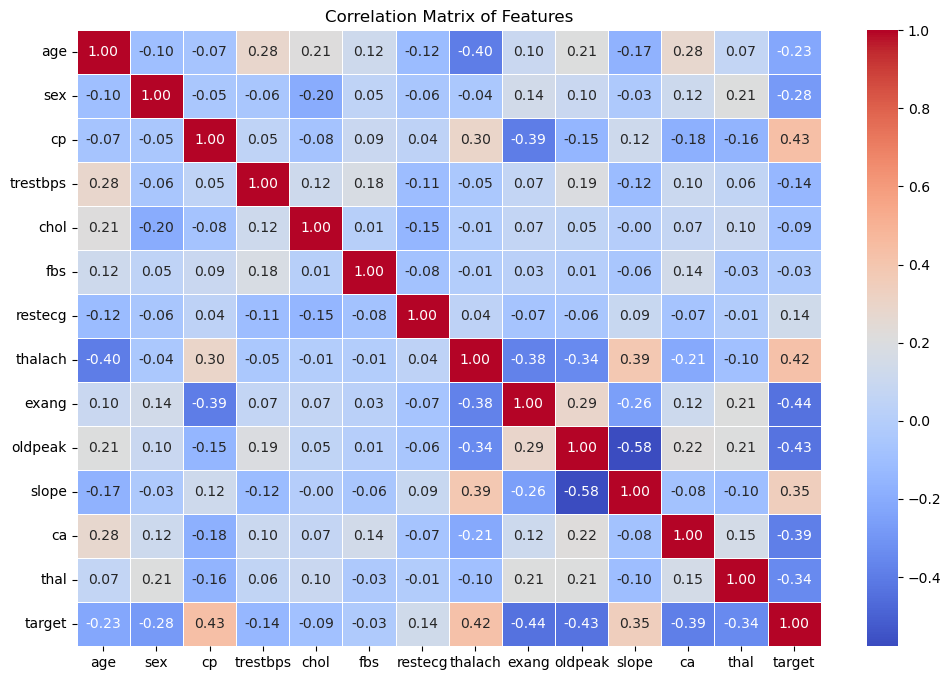

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = new_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')

# 2

C:\Users\suvee\AppData\Local\Temp\ipykernel_66588\3168617262.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=new_data, palette='viridis')


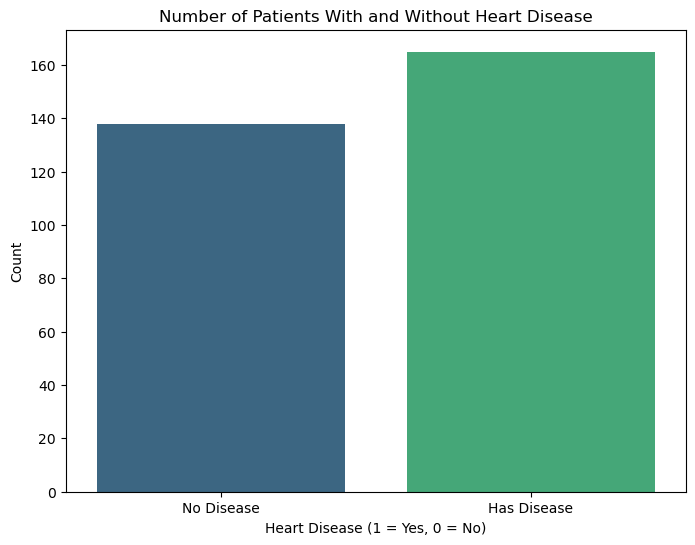

C:\Users\suvee\AppData\Local\Temp\ipykernel_66588\3168617262.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='age', data=new_data, palette='mako')


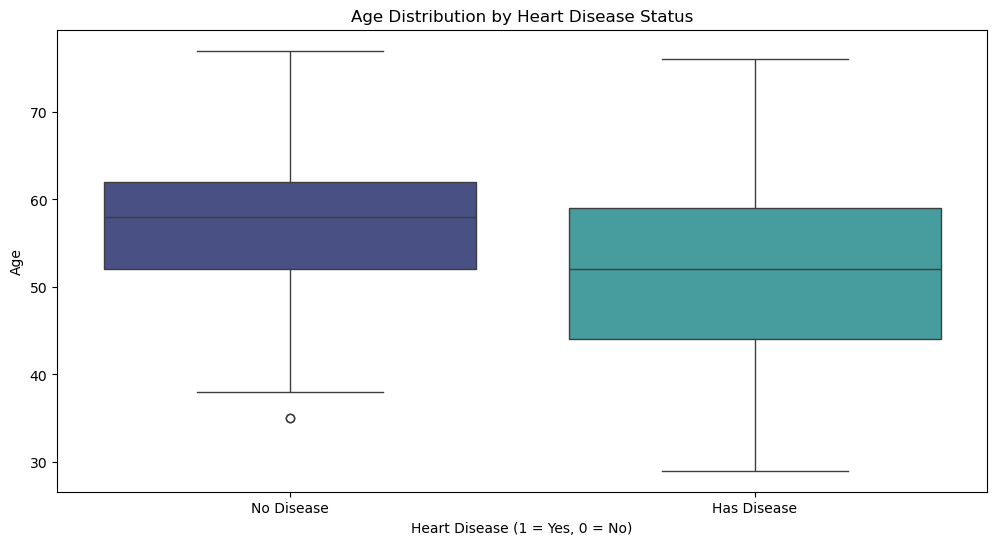

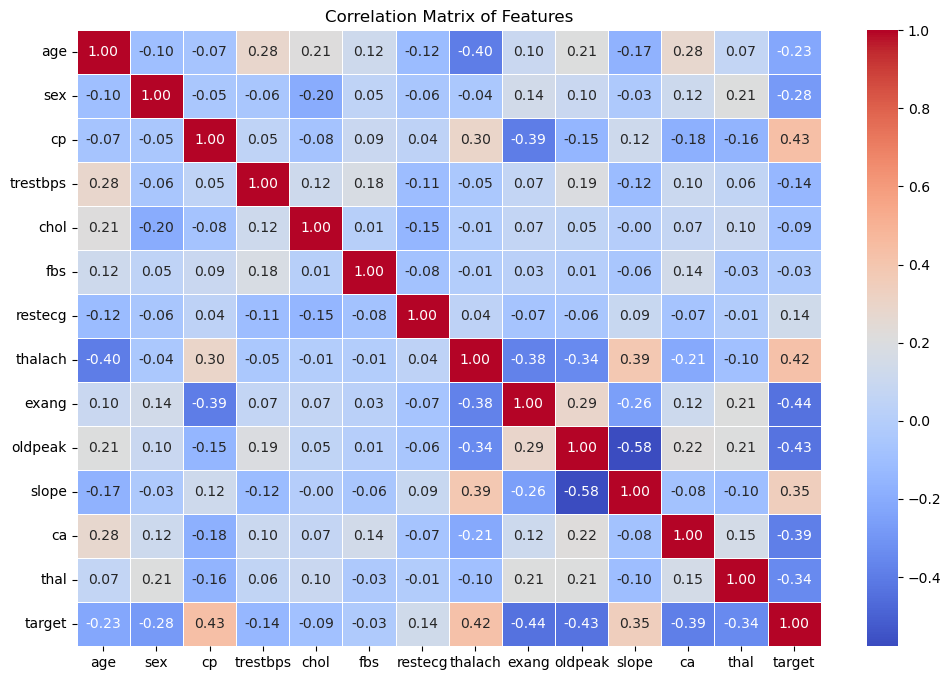

In [13]:
# Visualization 1: Number of patients having heart disease vs not
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=new_data, palette='viridis')
plt.title('Number of Patients With and Without Heart Disease')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Disease', 'Has Disease'])
plt.show()

# Visualization 2: Age vs Heart Disease
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='age', data=new_data, palette='mako')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Age')
plt.xticks([0, 1], ['No Disease', 'Has Disease'])
plt.show()

# Heat map already created; displaying for completeness
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# 3

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Divide the dataset into train (70%) and test (30%) sets
X = new_data.drop(columns=['target'])
y = new_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Build the confusion matrix and calculate accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

conf_matrix, accuracy, classification_rep

(array([[32,  9],
        [ 8, 42]], dtype=int64),
 0.8131868131868132,
 '              precision    recall  f1-score   support\n\n           0       0.80      0.78      0.79        41\n           1       0.82      0.84      0.83        50\n\n    accuracy                           0.81        91\n   macro avg       0.81      0.81      0.81        91\nweighted avg       0.81      0.81      0.81        91\n')

# 4

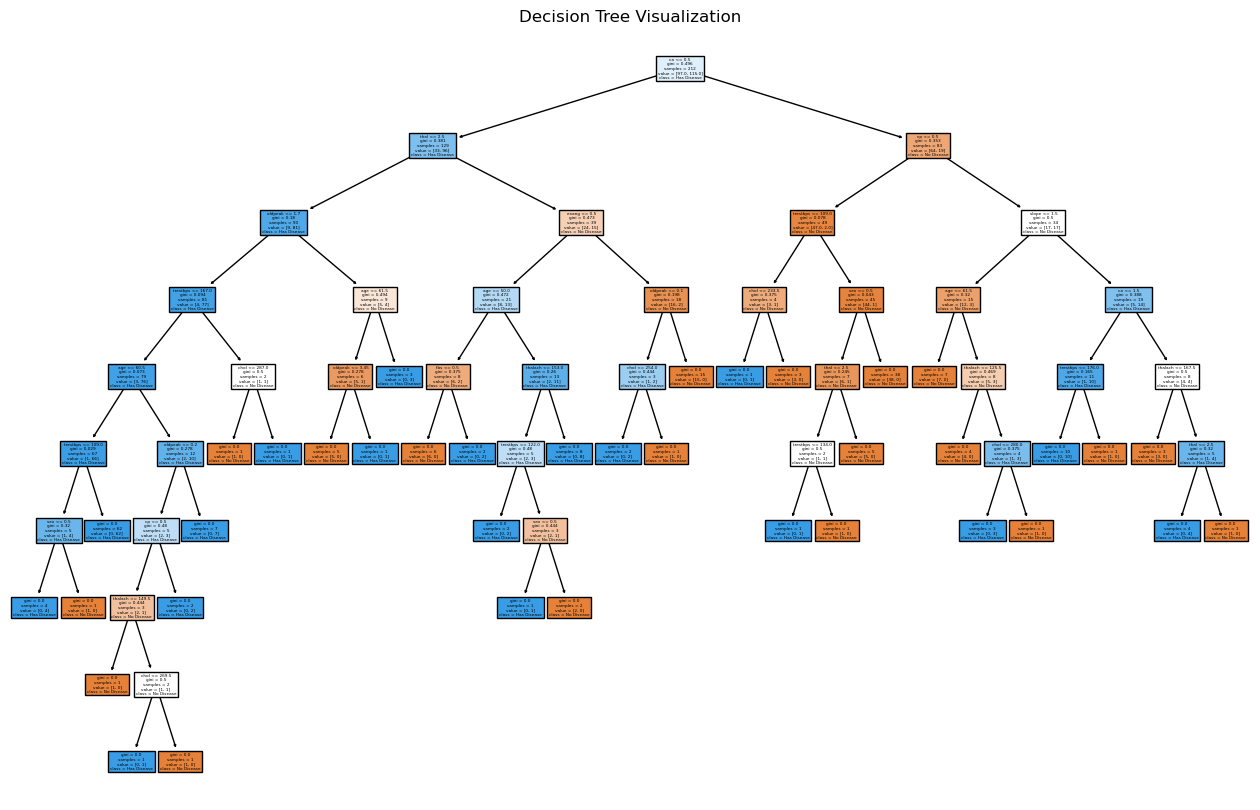

(array([[32,  9],
        [15, 35]], dtype=int64),
 0.7362637362637363,
 '              precision    recall  f1-score   support\n\n           0       0.68      0.78      0.73        41\n           1       0.80      0.70      0.74        50\n\n    accuracy                           0.74        91\n   macro avg       0.74      0.74      0.74        91\nweighted avg       0.74      0.74      0.74        91\n')

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Divide the dataset into train (70%) and test (30%) sets (already done above)
# Build the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = decision_tree.predict(X_test)

# Build the confusion matrix and calculate accuracy
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

# Visualize the decision tree
plt.figure(figsize=(16, 10))
plot_tree(decision_tree, feature_names=X.columns, class_names=["No Disease", "Has Disease"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

conf_matrix_dt, accuracy_dt, classification_rep_dt

# 5

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz

# Reinitialize and retrain the Random Forest model
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest.fit(X_train, y_train)

# Export one tree from the Random Forest as a Graphviz DOT file
dot_data = export_graphviz(
    random_forest.estimators_[0],
    out_file=None,
    feature_names=X.columns,
    class_names=["No Disease", "Has Disease"],
    filled=True,
    rounded=True,
    special_characters=True
)

# Visualize the tree using Graphviz
graph = graphviz.Source(dot_data)
graph.view(filename='random_forest_tree', directory='/mnt/data', cleanup=True)

# Display the confusion matrix and accuracy again for confirmation
conf_matrix_rf, accuracy_rf

NameError: name 'conf_matrix_rf' is not defined

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Predict on the test set again to ensure consistent results
y_pred_rf = random_forest.predict(X_test)

# Recompute confusion matrix and accuracy
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

conf_matrix_rf, accuracy_rf

(array([[33,  8],
        [ 8, 42]], dtype=int64),
 0.8241758241758241)

# 6

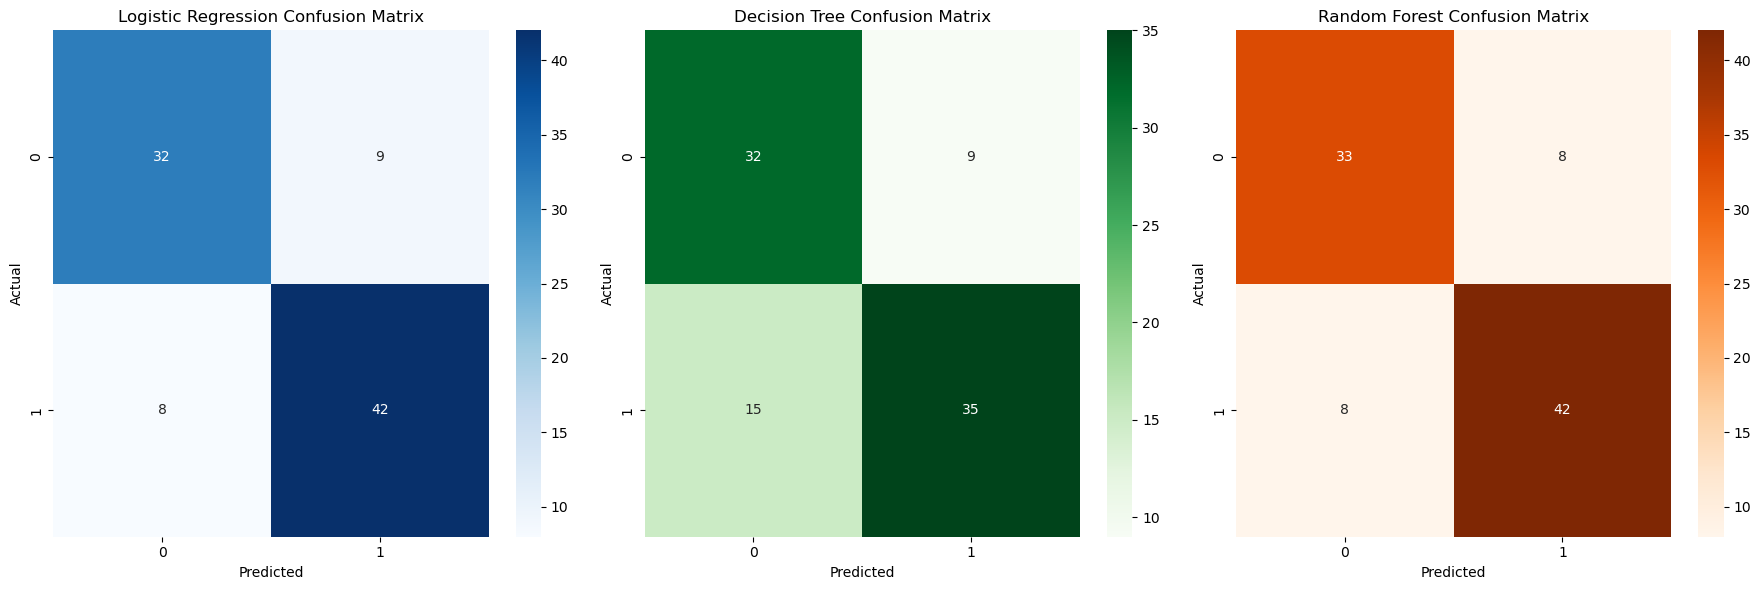

ModuleNotFoundError: No module named 'ace_tools'

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Collecting all model predictions
log_reg_preds = {
    "Confusion Matrix": confusion_matrix(y_test, y_pred),
    "Classification Report": classification_report(y_test, y_pred, output_dict=True),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred),
    "Accuracy": accuracy_score(y_test, y_pred)
}

decision_tree_preds = {
    "Confusion Matrix": confusion_matrix(y_test, y_pred_dt),
    "Classification Report": classification_report(y_test, y_pred_dt, output_dict=True),
    "Precision": precision_score(y_test, y_pred_dt),
    "Recall": recall_score(y_test, y_pred_dt),
    "F1-Score": f1_score(y_test, y_pred_dt),
    "Accuracy": accuracy_score(y_test, y_pred_dt)
}

random_forest_preds = {
    "Confusion Matrix": confusion_matrix(y_test, y_pred_rf),
    "Classification Report": classification_report(y_test, y_pred_rf, output_dict=True),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-Score": f1_score(y_test, y_pred_rf),
    "Accuracy": accuracy_score(y_test, y_pred_rf)
}

# Consolidate results into a DataFrame for comparison
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Precision": [log_reg_preds["Precision"], decision_tree_preds["Precision"], random_forest_preds["Precision"]],
    "Recall": [log_reg_preds["Recall"], decision_tree_preds["Recall"], random_forest_preds["Recall"]],
    "F1-Score": [log_reg_preds["F1-Score"], decision_tree_preds["F1-Score"], random_forest_preds["F1-Score"]],
    "Accuracy": [log_reg_preds["Accuracy"], decision_tree_preds["Accuracy"], random_forest_preds["Accuracy"]]
})

# Visualize confusion matrices with heatmaps
plt.figure(figsize=(18, 6))

# Logistic Regression Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(log_reg_preds["Confusion Matrix"], annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Decision Tree Confusion Matrix
plt.subplot(1, 3, 2)
sns.heatmap(decision_tree_preds["Confusion Matrix"], annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Random Forest Confusion Matrix
plt.subplot(1, 3, 3)
sns.heatmap(random_forest_preds["Confusion Matrix"], annot=True, fmt="d", cmap="Oranges")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# Display results for comparison
import ace_tools as tools; tools.display_dataframe_to_user(name="Model Performance Comparison", dataframe=results)

In [38]:
print(results)

                 Model  Precision  Recall  F1-Score  Accuracy
0  Logistic Regression   0.823529    0.84  0.831683  0.813187
1        Decision Tree   0.795455    0.70  0.744681  0.736264
2        Random Forest   0.840000    0.84  0.840000  0.824176


In [40]:
results.to_csv("model_performance_comparison.csv", index=False)